# Covid19 Analysis

In [180]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
# sns.set(rc={'figure.figsize':(15, 8)})
plt.rcParams["figure.figsize"] = (15,8)

In [181]:
rFact = 7

# Statewise analysis

In [239]:
response = requests.get("https://api.covid19india.org/v4/min/timeseries.min.json")
data = response.json()
print(response.status_code)

200


In [240]:
# print(data['TN']['dates'].keys())

In [241]:
data['TN']['dates']['2021-05-24'].keys()

dict_keys(['delta', 'delta7', 'total'])

In [242]:
data['TN']['dates']['2021-05-24']['delta']

{'confirmed': 34867,
 'deceased': 404,
 'recovered': 27026,
 'tested': 168194,
 'vaccinated': 82627}

In [372]:
def getDataStCt(data, date, state):
    
    try:
        dat = data[state]['dates'][date]['delta']
        return dat['confirmed']
    except:
        print(date)
        return 0
getDataStCt(data, '2021-05-24', 'TN')    

34867

In [369]:
def getDataStDt(data, date, state):
    
    try:
        dat = data[state]['dates'][date]['delta']
        return dat['deceased']
    except:
        return 0
getDataStDt(data, '2021-05-24', 'TN')  

404

In [268]:
def getDataStCtot(data, date, state):
    dat = data[state]['dates'][date]['total']
    return dat['confirmed']
getDataStCtot(data, '2021-05-24', 'TN')   

1877211

In [269]:
def getDataStDtot(data, date, state):
    dat = data[state]['dates'][date]['total']
    try:
        return dat['deceased']
    except:
        return 0
getDataStDtot(data, '2021-05-24', 'TN')  

20872

# Mortality

In [248]:
dates = list(data['TN']['dates'].keys())[-(90+rFact):]
# dates

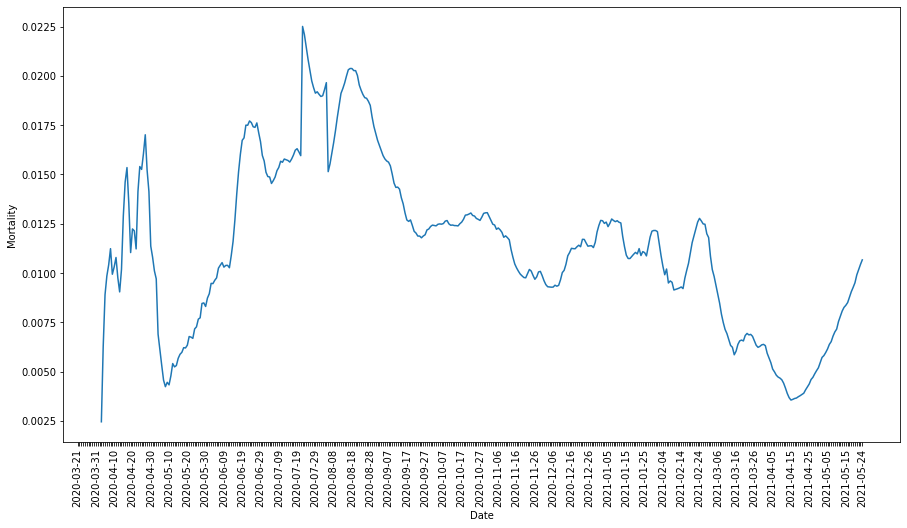

In [270]:
dates = list(data['TN']['dates'].keys())[14:]
dect = [getDataStDt(data, d, state) for d in dates]
confct = [getDataStCt(data, d, state) for d in dates]
df = pd.DataFrame(list(zip(dates, dect, confct)),
           columns =['Date', 'deceased', 'Confirmed cases'])
df['ravgD'] = df['deceased'].rolling(rFact+7).mean()
df['ravgC'] = df['Confirmed cases'].rolling(rFact+7).mean()
df['Mortality'] = df['ravgD'] / df['ravgC'] 
ax = sns.lineplot(x="Date", y='Mortality', data=df)
plt.xticks(rotation=90)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    if ind == len(dates)-1:
        label.set_visible(True)
del(df)

(438, 438)

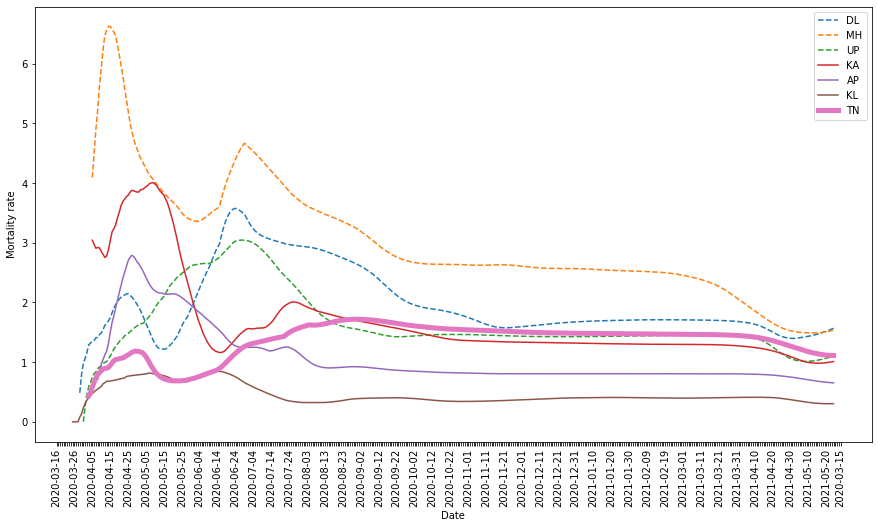

In [351]:
def martalityPlot(state, linw = 1.5, linestyle='-'):
    dates = list(data[state]['dates'].keys())[14:]
    dect = [getDataStDtot(data, d, state) for d in dates]
    confct = [getDataStCtot(data, d, state) for d in dates]
    df = pd.DataFrame(list(zip(dates, dect, confct)),
               columns =['Date', 'deceased', 'Confirmed cases'])
    df['ravgD'] = df['deceased'].rolling(rFact+7).mean()
    df['ravgC'] = df['Confirmed cases'].rolling(rFact+7).mean()
    df['Mortality rate'] = 100*df['ravgD'] / df['ravgC'] 

    ax = sns.lineplot(x="Date", y='Mortality rate', data=df, label = state, linewidth = linw, linestyle = linestyle)
    plt.xticks(rotation=90)

    return ax
dates = list(data['TN']['dates'].keys())[65:]



martalityPlot('DL', 1.5,'--')
martalityPlot('MH', 1.5,'--')
martalityPlot('UP', 1.5,'--')
martalityPlot('KA')
martalityPlot('AP')
martalityPlot('KL')
ax = martalityPlot('TN', 5)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    if ind == len(dates)+ 59:
        label.set_visible(True)
ind, len(dates) +  59

2020-03-16
2020-03-24
2020-12-31
2021-02-22
2021-03-13
2020-03-14
2020-03-17
2020-03-18
2020-05-01
2020-05-03
2020-05-04
2020-05-06
2020-05-07


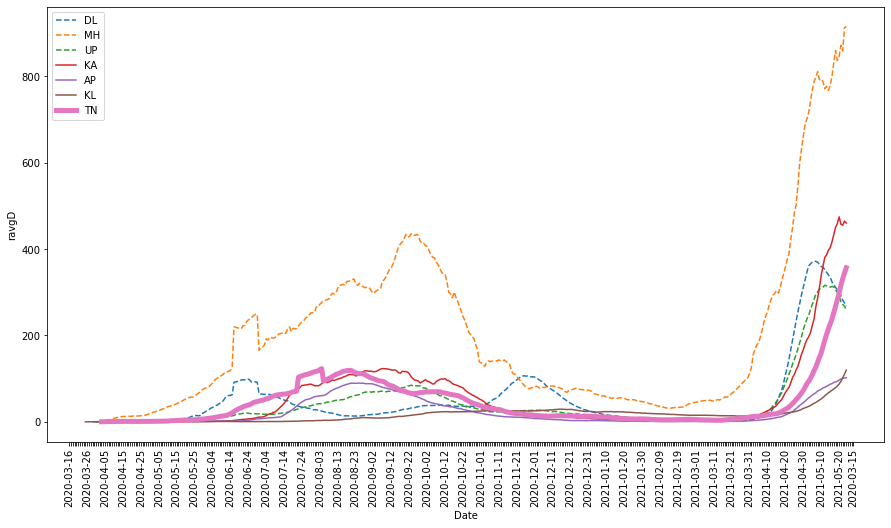

In [381]:
def martalityVPlot(state, linw = 1.5, linestyle='-'):
    dates = list(data[state]['dates'].keys())[14:]
    dect = [getDataStDt(data, d, state) for d in dates]
    confct = [getDataStCt(data, d, state) for d in dates]
    df = pd.DataFrame(list(zip(dates, dect, confct)),
               columns =['Date', 'deceased', 'Confirmed cases'])
    df['ravgD'] = df['deceased'].rolling(rFact+7).mean()
    df['ravgC'] = df['Confirmed cases'].rolling(rFact+7).mean()
    df['Mortality rate'] = 100*df['ravgD'] / df['ravgC'] 

    ax = sns.lineplot(x="Date", y='ravgD', data=df, label = state, linewidth = linw, linestyle = linestyle)
    plt.xticks(rotation=90)

    return ax
dates = list(data['TN']['dates'].keys())[100:]



martalityVPlot('DL', 1.5,'--')
martalityVPlot('MH', 1.5,'--')
martalityVPlot('UP', 1.5,'--')
martalityVPlot('KA')
martalityVPlot('AP')
martalityVPlot('KL')
ax = martalityVPlot('TN', 5)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    if ind == len(dates)+ 94:
        label.set_visible(True)


# Confirmed cases

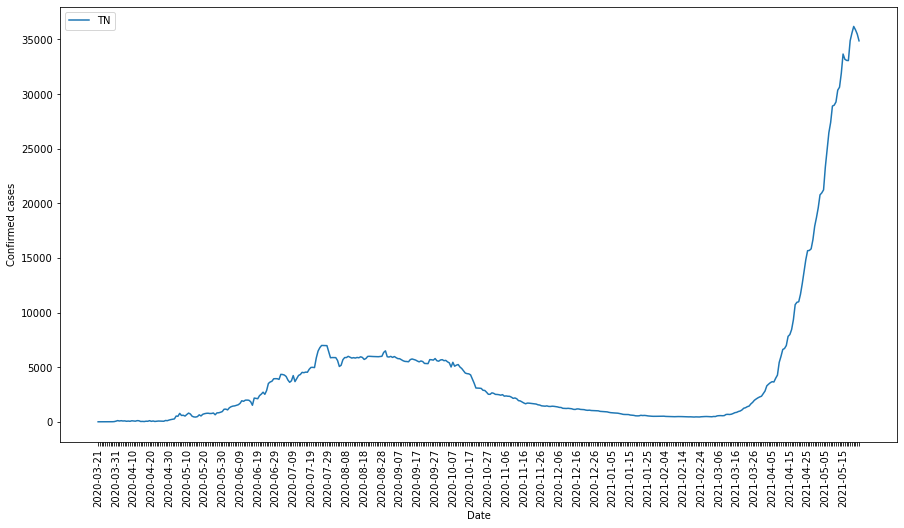

In [279]:
def statePlot(state):
    dates = list(data['TN']['dates'].keys())[14:]
    confct = [getDataStCt(data, d, state) for d in dates]
    df = pd.DataFrame(list(zip(dates, confct)),
               columns =['Date', 'Confirmed cases'])
    ax = sns.lineplot(x="Date", y='Confirmed cases', data=df, label = state)
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 10 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)

    plt.xticks(rotation=90)
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(dates,confct)
state = 'TN'
statePlot(state)

(372, 379)

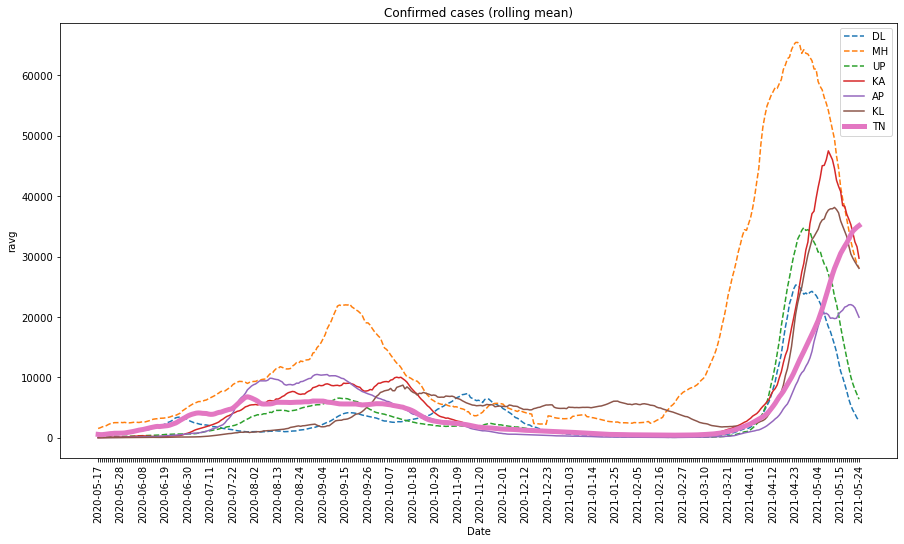

In [366]:
def stateRavgPlot(state, linw = 1.5, linestyle='-'):
    
    confct = [getDataStCt(data, d, state) for d in dates]
    df = pd.DataFrame(list(zip(dates, confct)),
               columns =['Date', 'Confirmed cases'])
    df['ravg'] = df['Confirmed cases'].rolling(rFact).mean()
    
    df = df[6:]
#     ax = sns.barplot(x="Date", y='Confirmed cases', data=df)

    ax = sns.lineplot(data=df, x="Date", y='ravg', label = state, linewidth = linw, linestyle = linestyle)


    
    plt.xticks(rotation=90)
    return ax
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(dates,confct)
state = 'TN'
dates = list(data['TN']['dates'].keys())[65:]


stateRavgPlot('DL', 1.5,'--')
stateRavgPlot('MH', 1.5,'--')
stateRavgPlot('UP', 1.5,'--')
stateRavgPlot('KA')
stateRavgPlot('AP')
stateRavgPlot('KL')
ax = stateRavgPlot('TN', 5)
plt.title('Confirmed cases (rolling mean)')
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 11 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    if ind == len(dates)-7:
        label.set_visible(True)
ind, len(dates) 

In [191]:
data.keys()

dict_keys(['AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DL', 'DN', 'GA', 'GJ', 'HP', 'HR', 'JH', 'JK', 'KA', 'KL', 'LA', 'LD', 'MH', 'ML', 'MN', 'MP', 'MZ', 'NL', 'OR', 'PB', 'PY', 'RJ', 'SK', 'TG', 'TN', 'TR', 'TT', 'UN', 'UP', 'UT', 'WB'])

In [192]:
print(data['TN']['dates']['2021-05-24'])

{'delta': {'confirmed': 34867, 'deceased': 404, 'recovered': 27026, 'tested': 168194, 'vaccinated': 82627}, 'delta7': {'confirmed': 245920, 'deceased': 2867, 'recovered': 173069, 'tested': 1196274, 'vaccinated': 478009}, 'total': {'confirmed': 1877211, 'deceased': 20872, 'recovered': 1554759, 'tested': 26469766, 'vaccinated': 7473489}}


# Districtwise Analysis

In [217]:
response = requests.get("https://api.covid19india.org/v4/min/data-all.min.json")
data = response.json()
print(response.status_code)

200


In [218]:
# print(data.keys())

In [219]:
print(data['2021-05-24'].keys())

dict_keys(['AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DL', 'DN', 'GA', 'GJ', 'HP', 'HR', 'JH', 'JK', 'KA', 'KL', 'LA', 'LD', 'MH', 'ML', 'MN', 'MP', 'MZ', 'NL', 'OR', 'PB', 'PY', 'RJ', 'SK', 'TG', 'TN', 'TR', 'TT', 'UP', 'UT', 'WB'])


In [220]:
print(data['2021-05-24']['TN']['districts'].keys())

dict_keys(['Airport Quarantine', 'Ariyalur', 'Chengalpattu', 'Chennai', 'Coimbatore', 'Cuddalore', 'Dharmapuri', 'Dindigul', 'Erode', 'Kallakurichi', 'Kancheepuram', 'Kanyakumari', 'Karur', 'Krishnagiri', 'Madurai', 'Nagapattinam', 'Namakkal', 'Nilgiris', 'Perambalur', 'Pudukkottai', 'Railway Quarantine', 'Ramanathapuram', 'Ranipet', 'Salem', 'Sivaganga', 'Tenkasi', 'Thanjavur', 'Theni', 'Thiruvallur', 'Thiruvarur', 'Thoothukkudi', 'Tiruchirappalli', 'Tirunelveli', 'Tirupathur', 'Tiruppur', 'Tiruvannamalai', 'Vellore', 'Viluppuram', 'Virudhunagar'])


In [221]:
print(data['2021-05-24']['TN']['districts']['Chennai'].keys())

dict_keys(['delta', 'delta7', 'meta', 'total'])


In [222]:
print(data['2021-05-24']['TN']['districts']['Chennai']['delta'])

{'confirmed': 5047, 'deceased': 81, 'recovered': 5870, 'vaccinated': 21790}


In [223]:
print(data['2021-05-24']['TN']['districts']['Chennai']['meta'])

{'notes': '[July 22]: 444 backdated deceased entries added to Chennai in TN bulletin.', 'population': 7100000, 'tested': {'last_updated': '2021-02-01'}}


In [224]:
print(data['2021-05-24']['TN']['districts']['Chennai']['total'])

{'confirmed': 483757, 'deceased': 6460, 'recovered': 429146, 'tested': 2667777, 'vaccinated': 1849606}


In [225]:
def getDataDt(data, date, district):
#     print(date)
    dat = data[date]['TN']['districts'][district]['delta']
#     print(dat)
    try:
        return dat['deceased']
    except:
        return 0
getDataDt(data, '2021-05-24', 'Chennai')

# [getDataDt(data, d, district) for d in dates]

81

In [226]:
def getDataCt(data, date, district):
    dat = data[date]['TN']['districts'][district]['delta']
    return dat['confirmed']
getDataCt(data, '2021-05-24', 'Chennai')
    

5047

In [227]:
dates = list(data.keys())[108:]
confct = [getDataCt(data, d, district) for d in dates]
df = pd.DataFrame(list(zip(dates, confct)),
               columns =['Date', 'Confirmed cases'])
df['ravg'] = df['Confirmed cases'].rolling(rFact).mean()
df = df[6:]
df

,Date,Confirmed cases,ravg
6,2020-06-20,11,11.714286
7,2020-06-21,13,13.142857
8,2020-06-22,12,14.285714
9,2020-06-23,12,15.571429
10,2020-06-24,22,18.142857
...,...,...,...
340,2021-05-20,3342,3209.000000
341,2021-05-21,3251,3215.857143
342,2021-05-22,3168,3222.000000
343,2021-05-23,3949,3332.714286


In [204]:
dates = list(data.keys())[-(90+rFact):]
confct = [getDataCt(data, d, district) for d in dates]
Dect = [getDataDt(data, d, district) for d in dates]
df = pd.DataFrame(list(zip(dates, confct, Dect)),
               columns =['Date', 'Confirmed cases', 'deceased'])
df['ravgD'] = df['deceased'].rolling(rFact).mean()
df['ravg'] = df['Confirmed cases'].rolling(rFact).mean()

df = df[6:]
df

,Date,Confirmed cases,deceased,ravgD,ravg
6,2021-02-23,161,0,2.142857,147.571429
7,2021-02-24,185,3,2.571429,151.142857
8,2021-02-25,168,3,2.428571,152.714286
9,2021-02-26,164,2,2.285714,156.714286
10,2021-02-27,181,2,2.142857,165.571429
...,...,...,...,...,...
92,2021-05-20,5952,74,80.285714,6169.571429
93,2021-05-21,5814,109,85.142857,6094.142857
94,2021-05-22,5409,84,85.428571,5903.857143
95,2021-05-23,5039,81,88.285714,5759.857143


,Date,Confirmed cases
0,2020-06-14,1452
1,2020-06-15,1348
2,2020-06-16,1001
3,2020-06-17,1311
4,2020-06-18,1514
...,...,...
340,2021-05-20,5952
341,2021-05-21,5814
342,2021-05-22,5409
343,2021-05-23,5039


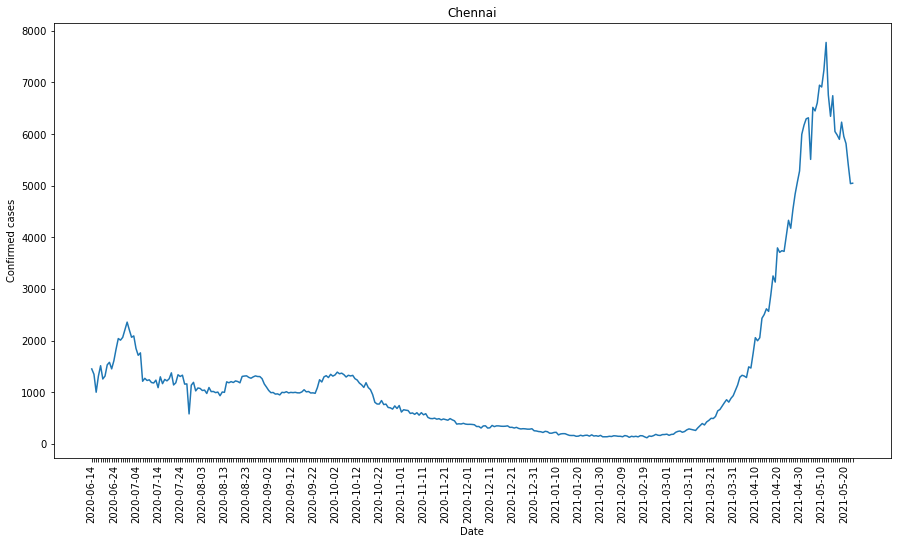

In [228]:

def districtPlot(district):
    confct = [getDataCt(data, d, district) for d in dates]

    df = pd.DataFrame(list(zip(dates, confct)),
                   columns =['Date', 'Confirmed cases'])
#     ax = sns.barplot(x="Date", y='Confirmed cases', data=df)

    ax = sns.lineplot(data=df, x="Date", y="Confirmed cases")
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 10 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.title(district)
    plt.xticks(rotation=90)
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(dates,confct)
    return df
district = 'Chennai'
districtPlot(district)

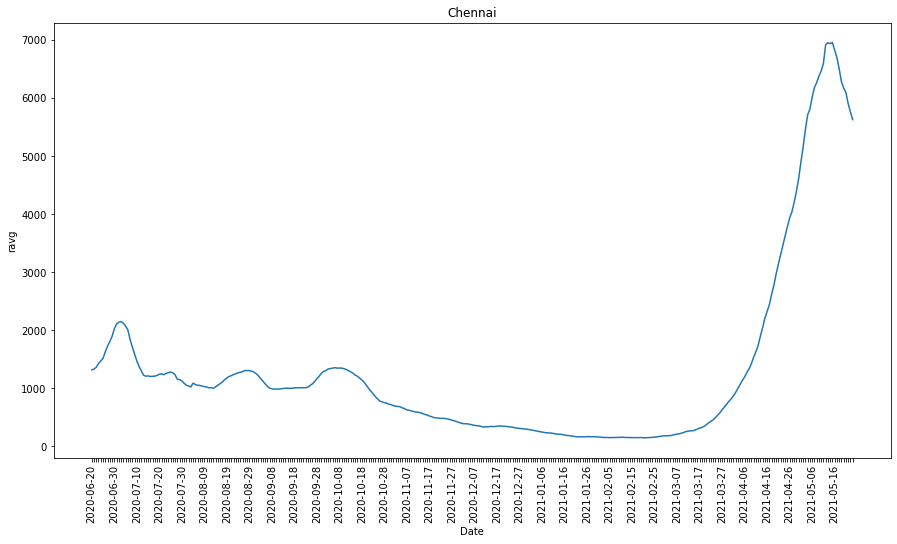

In [230]:

def districtPlotRavg(district):
    confct = [getDataCt(data, d, district) for d in dates]

    df = pd.DataFrame(list(zip(dates, confct)),
                   columns =['Date', 'Confirmed cases'])

    df['ravg'] = df['Confirmed cases'].rolling(rFact).mean()
    
    df = df[6:]
#     ax = sns.barplot(x="Date", y='Confirmed cases', data=df)

    ax = sns.lineplot(data=df, x="Date", y='ravg')
#     ax = sns.lineplot(data=df, x="Date", y='ravgD')
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 10 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.title(district)
    plt.xticks(rotation=90)
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(dates,confct)
    return df
district = 'Chennai'
df1 = districtPlotRavg(district)

In [231]:

# def districtPlotRavgD(district):
#     confct = [getDataCt(data, d, district) for d in dates]

#     Dect = [getDataDt(data, d, district) for d in dates]
#     df = pd.DataFrame(list(zip(dates, confct, Dect)),
#                    columns =['Date', 'Confirmed cases', 'deceased'])
#     df['ravgD'] = df['deceased'].rolling(rFact).mean()
#     df['ravg'] = df['Confirmed cases'].rolling(rFact).mean()
    
#     df = df[6:]
# #     ax = sns.barplot(x="Date", y='Confirmed cases', data=df)

# #     ax = sns.lineplot(data=df, x="Date", y='ravg')
#     ax = sns.lineplot(data=df, x="Date", y='ravgD')
#     for ind, label in enumerate(ax.get_xticklabels()):
#         if ind % 10 == 0:  # every 10th label is kept
#             label.set_visible(True)
#         else:
#             label.set_visible(False)
#     plt.title(district)
#     plt.xticks(rotation=90)
# #     fig = plt.figure()
# #     ax = fig.add_axes([0,0,1,1])
# #     ax.bar(dates,confct)
#     return df
# district = 'Chennai'
# dfD1 = districtPlotRavgD(district)

,Date,Confirmed cases
0,2020-06-14,3
1,2020-06-15,4
2,2020-06-16,3
3,2020-06-17,4
4,2020-06-18,24
...,...,...
340,2021-05-20,3342
341,2021-05-21,3251
342,2021-05-22,3168
343,2021-05-23,3949


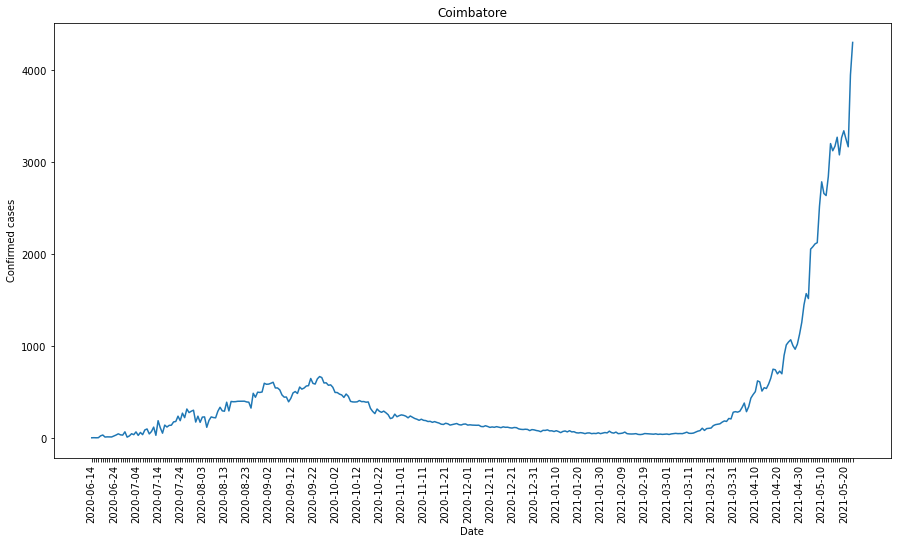

In [232]:
dates = list(data.keys())[108:]
district = 'Coimbatore'
districtPlot(district)

In [233]:
# district = 'Coimbatore'
# dfD2 = districtPlotRavgD(district)

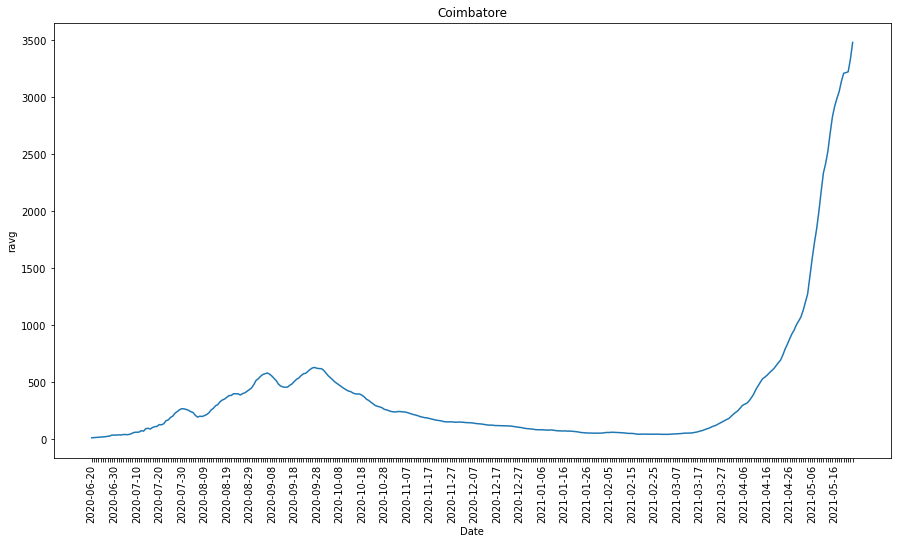

In [234]:
district = 'Coimbatore'
df2 = districtPlotRavg(district)

In [235]:
# district = 'Namakkal'
# districtPlot(district)

In [236]:
df1['ravg']

6      1313.857143
7      1325.142857
8      1358.285714
9      1422.857143
10     1465.428571
          ...     
340    6169.571429
341    6094.142857
342    5903.857143
343    5759.857143
344    5626.571429
Name: ravg, Length: 339, dtype: float64

In [237]:
df2['ravg']

6        11.714286
7        13.142857
8        14.285714
9        15.571429
10       18.142857
          ...     
340    3209.000000
341    3215.857143
342    3222.000000
343    3332.714286
344    3480.000000
Name: ravg, Length: 339, dtype: float64

Text(0.5, 1.0, 'Chennai Vs Coimbatore')

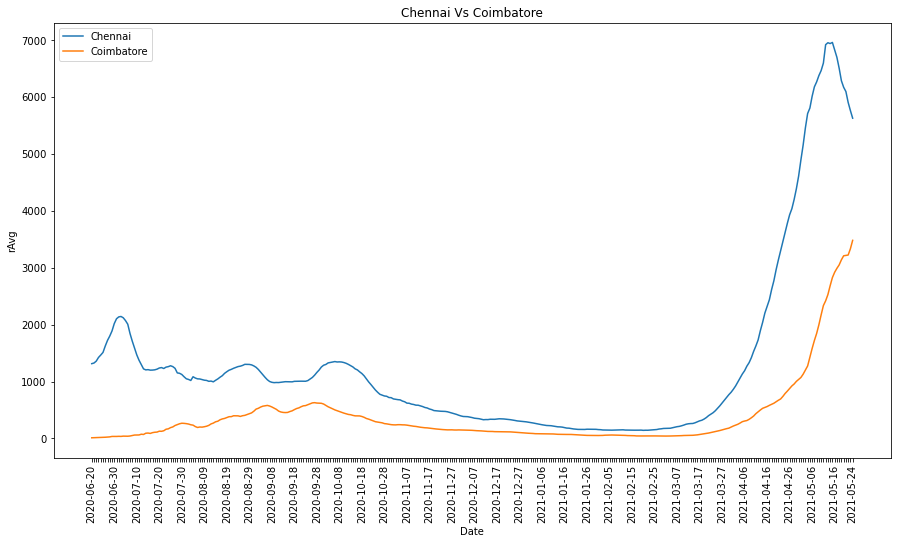

In [238]:
frame = {'Date':df1.Date, 'Chennai': df1['ravg'], 'Coimbatore': df2['ravg'] }
df = pd.DataFrame(frame)
ax = sns.lineplot(data=df, x="Date", y='Chennai', label = 'Chennai')
ax = sns.lineplot(data=df, x="Date", y='Coimbatore', label = 'Coimbatore')
plt.ylabel('rAvg')
plt.xticks(rotation=90)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    if ind == len(dates)-7:
        label.set_visible(True)
plt.title('Chennai Vs Coimbatore')